<a href="https://colab.research.google.com/github/sowrabh-adiga/all-Machine-learning-codes/blob/main/end_to_end_heart_diesease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict heart disease using machine learning

###This project attempts to build machine learning model to predict the heart disease risk in a person based on medical data.

###Approach:


1.   `Problem Defination`
2.   `Data`
3.   `Evaluation`
4.   `Features`
5.   `Modelling`
6.   `Experimentation`

## 1. Problem defination

> Given medical parameters, predicting the probability of heart disease

## 2. Data

>UCI heart disease dataset (Also present in kaggle)

UCI : https://archive.ics.uci.edu/ml/datasets/heart+disease

Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci 



## 3. Evaluation
>  Proof of concept needs to have `95% accuracy` to pursue further

## 4. Features

* age
* sex
* chest pain 
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [1]:
#import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plots to appear inside NB
%matplotlib inline 

#models import
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

#model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

##Load Data

In [2]:
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Null values absent: DataFrame is clean

### Data Exploration (Exploratory Data Aanalysis [EDA])

Goal is to Understand data:

1. What is being solved?
2. Data types available in the DataFrame, howw to deal with them?
3. find missing data and deal with them.
4. Find Outliers (Garbage data [Not useful for model]) and eliminate them.
5. any features to be added, modified, removed to enhance model?

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# look for balanced dataset
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0, 0.5, 'No. of datapoints')

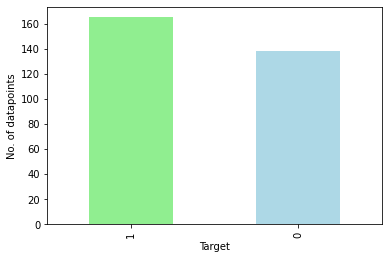

In [ ]:
df['target'].value_counts().plot(kind='bar', color = ['lightgreen','lightblue'])
plt.xlabel('Target')
plt.ylabel('No. of datapoints')

### The dataset has almost same number of 1's and 0's

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
df.isna().sum()
# Null values absent: DataFrame is clea

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Heart Disease frequency according to sex

df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
# Compare Target column with sex xolumn
# pd.crosstab(df['target'],df['sex'])
#or
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

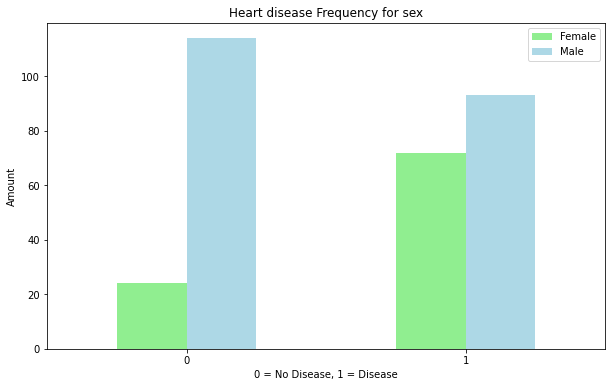

In [ ]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color = ['lightgreen','lightblue'])
plt.title('Heart disease Frequency for sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)

In [ ]:
!date

Thu Jun  3 11:48:54 UTC 2021


In [ ]:
#max-heart-rate == Thalach

df['thalach'].value_counts()

# there are many feature so bar graph is not intuitive

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

Age vs Max-Heart-Rate

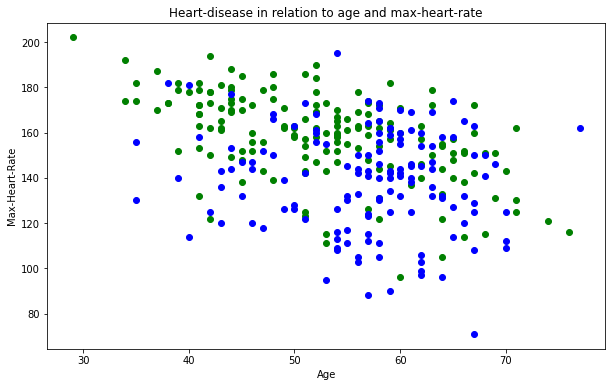

In [ ]:
#create another figure
plt.figure(figsize=(10,6))

#scatter plot

# df['age'][df['target'] ==1]

#--------------or---------------#

#Scatter plot for age vs max-heart-rate with heart disease
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c='green');
#Scatter plot for age vs max-heart-rate without heart disease     
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c='blue');
# Add info
plt.title("Heart-disease in relation to age and max-heart-rate")
plt.xlabel("Age")
plt.ylabel("Max-Heart-Rate");

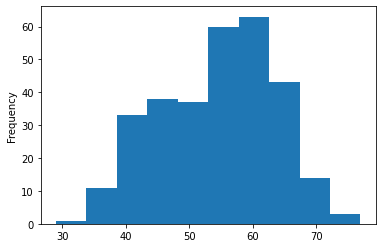

In [ ]:
#check distribution with age column with histogram
df.age.plot.hist()

In [ ]:
# Heart-Disease-Frequency  per chest pain type
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16



1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
  
  0: Typical angina: chest pain related decrease blood supply to the heart

  1: Atypical angina: chest pain not related to heart

  2: Non-anginal pain: typically esophageal spasms (non heart related)

  3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
6. serum = LDL + HDL + .2 * triglycerides above 200 is cause for concern
7. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) '>126' mg/dL signals diabetes
8. restecg - resting electrocardiographic results

  0: Nothing to note

  1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat

  2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber
7. thalach - maximum heart rate achieved
8. exang - exercise induced angina (1 = yes; 0 = no)
9. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
10. slope - the slope of the peak exercise ST segment

  0: Upsloping: better heart rate with excercise (uncommon)

  1: Flatsloping: minimal change (typical healthy heart)

  2: Downslopins: signs of unhealthy heart
11. ca - number of major vessels (0-3) colored by flourosopy colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots)
12. thal - thalium stress result

 1,3: normal
 6: fixed defect: used to be defect but ok now
 7: reversable defect: no proper blood movement when excercising
13. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

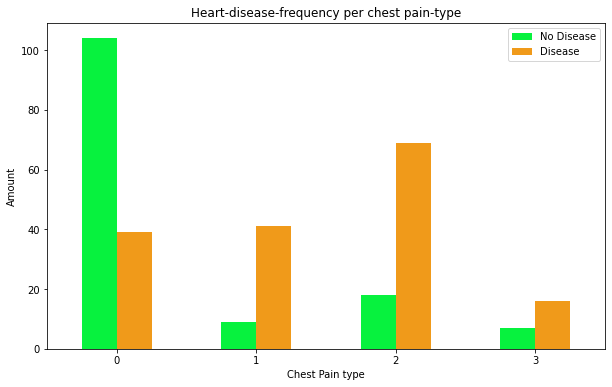

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color = ['#07f23e','#f09a1a'])
#details for the plot
plt.title('Heart-disease-frequency per chest pain-type')
plt.xlabel('Chest Pain type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

In [ ]:
# Correlation matrix
crr_matrix = df.corr()
crr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


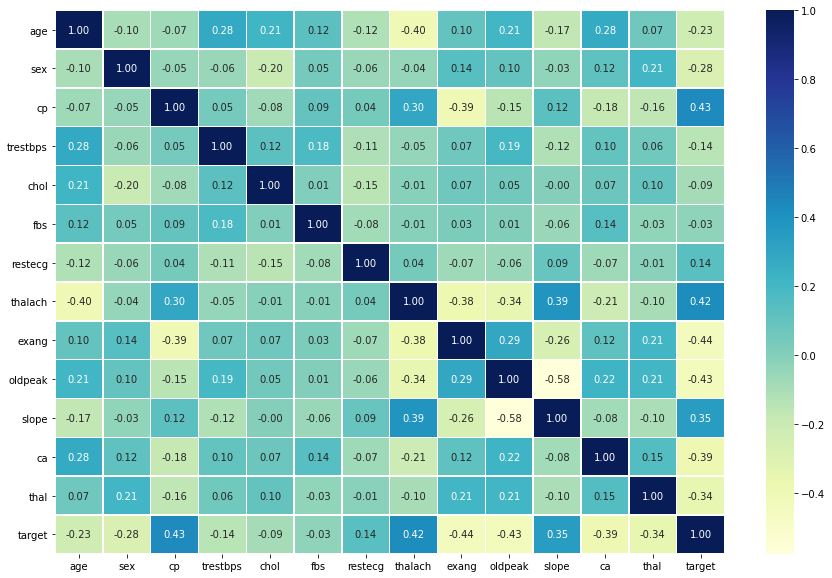

In [ ]:
# Makin' this more visual
fig, ax  = plt.subplots(figsize=(15,10))
ax = sns.heatmap(crr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');

In [ ]:
# import matplotlib.pyplot as mp
# import pandas as pd
# import seaborn as sb
# import numpy as np
  
# # import file with data
# data = pd.read_csv("C:\\Users\\Vanshi\\Desktop\\gfg\\bestsellers.csv")
  
# # creating mask
# mask = np.triu(np.ones_like(data.corr()))
  
# # plotting a triangle correlation heatmap
# dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True, mask=mask)
  
# # displaying heatmap
# mp.show()

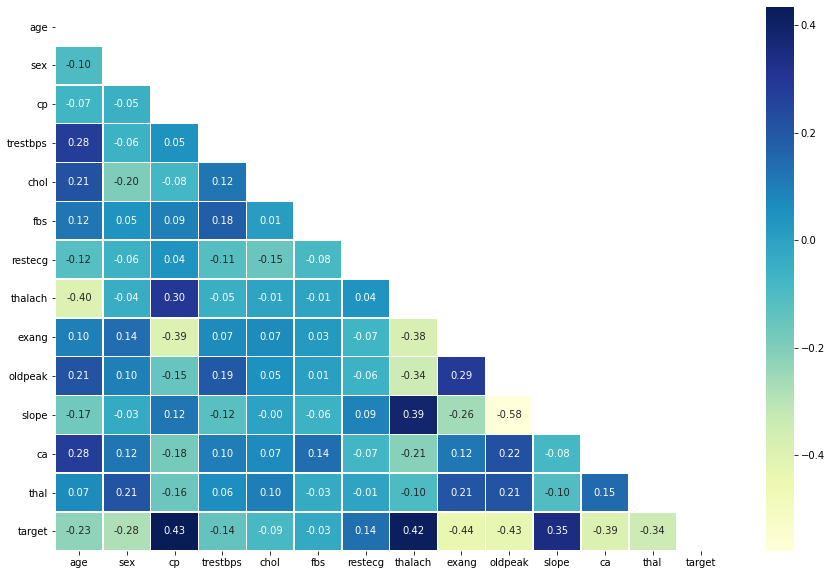

In [ ]:
 
# creating mask
mask = np.triu(np.ones_like(crr_matrix))
  
# plotting a triangle correlation heatmap
fig1, ax1  = plt.subplots(figsize=(15,10))
ax1 = sns.heatmap(crr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='YlGnBu',
                  mask=mask);
  


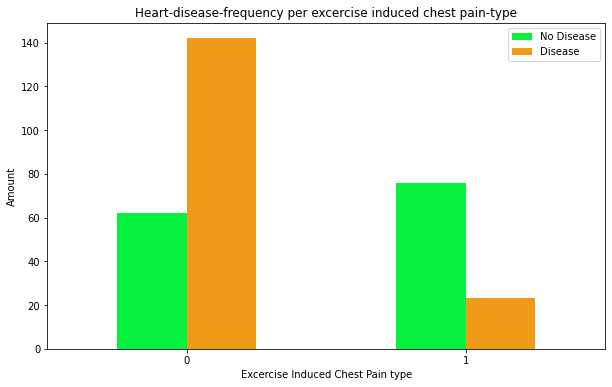

In [ ]:
pd.crosstab(df.exang,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color = ['#07f23e','#f09a1a'])
#details for the plot
plt.title('Heart-disease-frequency per excercise induced chest pain-type')
plt.xlabel('Excercise Induced Chest Pain type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

In [3]:
# create data
x = df.drop('target',axis=1)
y = df['target']

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [4]:
#split data  into train and tst set
np.random.seed(42)

#split data
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size = 0.2)
                        

In [5]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [ ]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Train and test set is obtained, run ML model with train set and test it on test set

choosing ML model according to 

>https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Going to test 

1. Linear SVC
2. K-means
3. Ensemble SVM (Random Forest Classifier)
4. Logistic regression



In [ ]:
#Models in a dictionary

models = {'Linear_SVM': svm.SVC(),
          'Logistic_Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random_Forest' : RandomForestClassifier()}

#Create a function to fit and score models

def fit_and_score(models,x_train,x_test,y_train,y_test):
  """
  fits and evaluates the ML models on training data (x_train,y_train) and test_data (x_test,y_test)
  respectively.
  """
  #set Random seed
  np.random.seed(42) 

  #dictionary to store model scores

  model_score = {}

  for name,model in models.items():
    #Fit the model to data
    model.fit(x_train,y_train)
    #Evaluate the model and append it's score to model_scores
    model_score[name] = model.score(x_test,y_test)
  return model_score



In [ ]:
models_score = fit_and_score(models=models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test= y_test)

models_score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Linear_SVM': 0.7049180327868853,
 'Logistic_Regression': 0.8852459016393442,
 'Random_Forest': 0.8360655737704918}

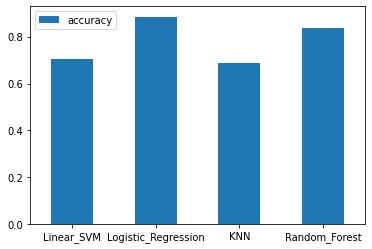

In [ ]:
model_comparision = pd.DataFrame(models_score,index=['accuracy'])
model_comparision.T.plot.bar(rot=0); #'T' is transpose

Here KNN, Linear_SVM have lower scores so eliminate them
>considering logistic regression for hyperparameter tuning

😕 Tuning KNN

In [ ]:
train_scores = []
test_scores = []

# create a list of n_neighbors
neighbors = range(1,21)

# setup KNN instance

KNN = KNeighborsClassifier()

# loop through all the neighbors

for i in neighbors:
  KNN.set_params(n_neighbors=i)
  # fit the algorithm
  KNN.fit(x_train,y_train)
  # update training scores list
  train_scores.append(KNN.score(x_train,y_train))
  # update the test score list
  test_scores.append(KNN.score(x_test,y_test))



 

In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on test data : 75.4098%


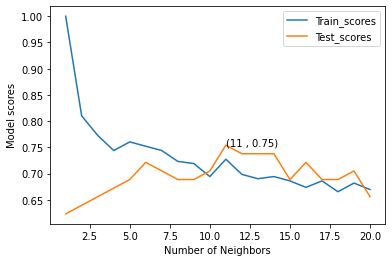

In [ ]:
plt.plot(neighbors,train_scores, label='Train_scores')
plt.plot(neighbors,test_scores, label='Test_scores')

# To get certain amt of readings on x-axis
# plt.xticks(np.arange(1,21,1))

# To mark the maximum point
test_scores_max = max(test_scores)
neighbor_pos = test_scores.index(test_scores_max)
neighbor_max = neighbors[neighbor_pos]
plt.annotate(f"({neighbor_max} , {test_scores_max:0.2f})", (neighbor_max, test_scores_max))

plt.xlabel("Number of Neighbors")
plt.ylabel('Model scores')
plt.legend()

print(f"Maximum KNN score on test data : {max(test_scores)*100:.4f}%")

even with hyperparameter tuning KNN is stuck at 75%, KNN is definately discarded

Hyperparameter tuning with RandomizedSearchCV

---
For Logistic regression, Random Forest



In [ ]:
# creatin' hyperparameter grid for LogisticRegression
log_reg_grid = {'C':np.logspace(-4,4,20),
                'solver': ['liblinear']}

# create hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}


In [ ]:
# LogisticRegression mode

np.random.seed(42)

# randomized hyperparameters tuning
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter = 20,
                                verbose=True)

# fit random hyper parameterfor LogisticRegression
rs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [ ]:
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

### For RandomForestClassifier

In [ ]:
# LogisticRegression mode

np.random.seed(42)

# randomized hyperparameters tuning
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = rf_grid,
                                cv=5,
                                n_iter = 20,
                                verbose=True)

# fit random hyper parameterfor LogisticRegression
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 19,
 'min_samples_split': 4,
 'n_estimators': 210}

In [ ]:
rs_rf.score(x_test,y_test)

0.8688524590163934

hyperparameter tuning with GridSearchCV on LogisticRegression



In [ ]:
log_reg_grid = {'C':np.logspace(-4,4,30),
                'solver': ['liblinear']}

# setting up hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter seach model

gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

### Evaluating classifier beyond accuracy

* ROC and AUC
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-score


In [ ]:

y_pred = gs_log_reg.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

ROC and AUC

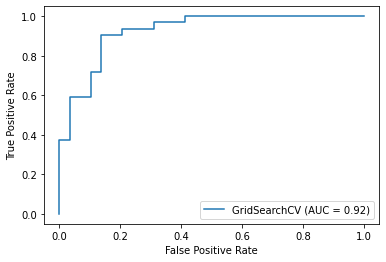

In [ ]:
plot_roc_curve(gs_log_reg,x_test,y_test);

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


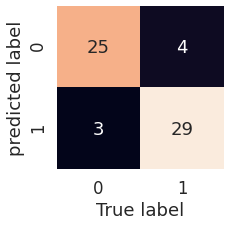

In [ ]:
sns.set(font_scale = 1.5)
def plot_conf_matrix(y_test,y_preds):
  """
  Plot confusion matrix with saeborn heatmap
  """
  fig,ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                   annot=True,
                   cbar=False)
  plt.xlabel("True label")
  plt.ylabel("predicted label")

plot_conf_matrix(y_test,y_pred)

ROC and AUC, Confusion matrix, next get classication report + presion + recall + F1 score

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
# calculate evaluation metric with cv
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
clf = LogisticRegression(C= 0.20433597178569418,
                         solver ='liblinear')

In [ ]:
#CV accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring='accuracy')
cv_acc
np.mean(cv_acc)

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [ ]:
def class_report(clf,x,y,cv,scoring):
  """
  Wrapper around cross_val_score function to give accuracy, precision, recall, F1 score in one call
  """
  result = []
  for score in scoring:
    temp = cross_val_score(clf,
                           x,
                           y,
                           cv=cv,
                           scoring=score)
    result.append(np.mean(temp))
  return result

In [ ]:
scoring = ['accuracy','precision','recall','f1']
result = class_report(clf,
                      x,
                      y,
                      cv=5,
                      scoring=scoring)

In [ ]:
result

[0.8446994535519124,
 0.8207936507936507,
 0.9212121212121213,
 0.8673007976269721]

In [ ]:

cv_metrics = pd.DataFrame([dict(zip(scoring,result))])

In [ ]:
cv_metrics

,accuracy,precision,recall,f1
0,0.844699,0.820794,0.921212,0.867301


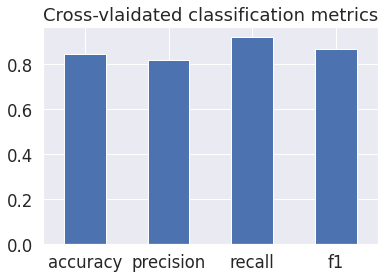

In [ ]:
cv_metrics.T.plot.bar(title= 'Cross-vlaidated classification metrics',legend=False,rot=0 )

Feature Importance

In [6]:
# Amount of contribution of features to the resultant classification
clf = LogisticRegression(C= 0.20433597178569418,
                         solver ='liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [8]:
# match coeff to colums
feature = dict(zip(df.columns, list(clf.coef_[0])))
feature

{'age': 0.0032076883508599633,
 'ca': -0.6373332766360461,
 'chol': -0.0016649614843449207,
 'cp': 0.660014324982524,
 'exang': -0.604701713592625,
 'fbs': 0.040172360271308105,
 'oldpeak': -0.5679545646616215,
 'restecg': 0.31603405294617176,
 'sex': -0.8606204883695241,
 'slope': 0.4508539209693025,
 'thal': -0.6755509369619848,
 'thalach': 0.02458922341328129,
 'trestbps': -0.01155970600550047}

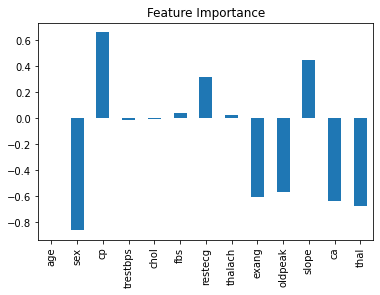

In [13]:
#  visualize feature importance 
feature_df = pd.DataFrame([feature])
feature_df.T.plot.bar(title='Feature Importance',legend=False)

In [14]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [15]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# Next steps
* >More data
* >Better model catBoost and XGboost
* >Improve current model
* >Finally export